## Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import nltk
import string
import seaborn as sns
from collections import Counter
import re

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Question 1 

In [3]:
s =  '''{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},
                          {"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],
             "errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'''


In [4]:
r1 = re.findall(r":\d+",s)

In [5]:
r1

[':1',
 ':2',
 ':3',
 ':4',
 ':5',
 ':6',
 ':7',
 ':8',
 ':9',
 ':10',
 ':11',
 ':648',
 ':649',
 ':650',
 ':651',
 ':652',
 ':653',
 ':3']

#### we need to use : sign here, beacuse if we are not using : sign that time we are getting 153 also. 

## Question - 2 

### Read the Data 

In [6]:
data = pd.read_csv("chrome_reviews.csv")

In [7]:
data.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


### check the duplicates 

In [8]:
data.duplicated().sum()

0

### null check 

In [9]:
data.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

In [10]:
data.shape

(7204, 10)

### drop the row based on null value in text column 

In [11]:
reviews_df = data[~pd.isnull(data['Text'])]

In [12]:
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


### Remove stopwords and Punctuations 

In [13]:
def text_process(Text):
    nopunc = [i for i in Text if i not in string.punctuation]
    nopunc = nopunc.lower()
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i not in stopwords.words('english')]

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [15]:
reviews_df["Text"] = reviews_df['Text'].apply(remove_punctuations)

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anurag.joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop = nltk.corpus.stopwords.words('english')

In [18]:
reviews_df['test_without_SW'] = reviews_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [19]:
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,This helpfull aap
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Good
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,Nice app
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,Many unwanted ads


### Count of Stars 

<AxesSubplot:xlabel='Star', ylabel='count'>

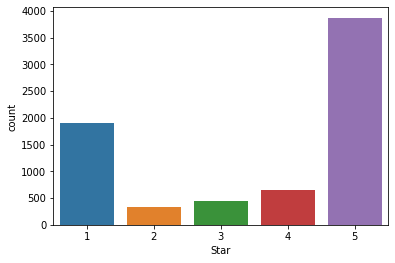

In [20]:
sns.countplot(reviews_df["Star"])

In [21]:
reviews_df["Star"].value_counts()

5    3870
1    1894
4     652
3     451
2     336
Name: Star, dtype: int64

### Word count, upper case char count and special char count 

In [22]:
reviews_df['Word Count'] = [len(Text.split()) for Text in reviews_df['Text']]
reviews_df['Uppercase Char Count'] = [sum(char.isupper() for char in Text) \
                              for Text in reviews_df['Text']]                           
reviews_df['Special Char Count'] = [sum(char in string.punctuation for char in Text) \
                            for Text in reviews_df['Text']]

In [23]:
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW,Word Count,Uppercase Char Count,Special Char Count
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,This helpfull aap,5,1,0
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Good,1,1,0
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall,8,2,0
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,Nice app,2,1,0
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,Many unwanted ads,3,1,0


In [24]:
reviews_df['Word Count'].describe()

count    7203.000000
mean        6.862418
std        12.036385
min         0.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       112.000000
Name: Word Count, dtype: float64

In [25]:
reviews_df['Uppercase Char Count'].describe()

count    7203.000000
mean        2.040955
std         8.929317
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       382.000000
Name: Uppercase Char Count, dtype: float64

In [26]:
reviews_df['Special Char Count'].describe()

count    7203.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Special Char Count, dtype: float64

### Define a function for get most common words 

In [27]:
def getMostCommonWords(reviews, n_most_common, stopwords=None):
    # param reviews: column from pandas.DataFrame (e.g. df['Reviews']) 
        #(pandas.Series)
    # param n_most_common: the top n most common words in reviews (int)
    # param stopwords: list of stopwords (str) to remove from reviews (list)
    # Returns list of n_most_common words organized in tuples as 
        #('term', frequency) (list)

    # flatten review column into a list of words, and set each to lowercase
    flattened_reviews = [word for review in reviews for word in \
                         review.lower().split()]


    # remove punctuation from reviews
    flattened_reviews = [''.join(char for char in review if \
                                 char not in string.punctuation) for \
                         review in flattened_reviews]


    # remove stopwords, if applicable
    if stopwords:
        flattened_reviews = [word for word in flattened_reviews if \
                             word not in stopwords]


    # remove any empty strings that were created by this process
    flattened_reviews = [review for review in flattened_reviews if review]

    return Counter(flattened_reviews).most_common(n_most_common)


In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anurag.joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Most common words and counts 

In [29]:
getMostCommonWords(reviews_df['Text'], 10)

[('i', 1497),
 ('update', 1489),
 ('to', 1423),
 ('good', 1381),
 ('the', 1187),
 ('it', 1165),
 ('app', 1028),
 ('not', 923),
 ('and', 889),
 ('is', 821)]

In [30]:
getMostCommonWords(reviews_df['Text'], 10, stopwords.words('english'))

[('update', 1489),
 ('good', 1381),
 ('app', 1028),
 ('chrome', 614),
 ('nice', 556),
 ('google', 387),
 ('cant', 334),
 ('best', 235),
 ('please', 219),
 ('great', 218)]

In [31]:
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW,Word Count,Uppercase Char Count,Special Char Count
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,This helpfull aap,5,1,0
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Good,1,1,0
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall,8,2,0
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,Nice app,2,1,0
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,Many unwanted ads,3,1,0


### Vedar for semtiment analysis

In [32]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anurag.joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
reviews_df['scores'] = reviews_df['Text'].apply(lambda Text: sid.polarity_scores(Text))
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW,Word Count,Uppercase Char Count,Special Char Count,scores
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,This helpfull aap,5,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Good,1,1,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall,8,2,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,Nice app,2,1,0,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,Many unwanted ads,3,1,0,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp..."


In [34]:
reviews_df['compound'] = reviews_df['scores'].apply(lambda score_dict: score_dict['compound'])
reviews_df['sentiment_type']=''
reviews_df.loc[reviews_df.compound>0,'sentiment_type']='POSITIVE'
reviews_df.loc[reviews_df.compound==0,'sentiment_type']='NEUTRAL'
reviews_df.loc[reviews_df.compound<0,'sentiment_type']='NEGATIVE'

In [35]:
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW,Word Count,Uppercase Char Count,Special Char Count,scores,compound,sentiment_type
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,This helpfull aap,5,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Good,1,1,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,POSITIVE
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall,8,2,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,Nice app,2,1,0,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,POSITIVE
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,Many unwanted ads,3,1,0,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp...",-0.2263,NEGATIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

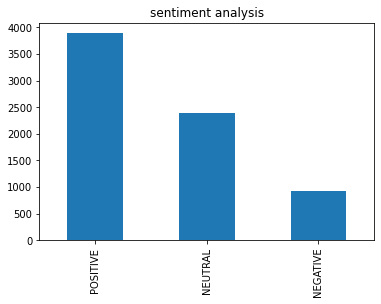

In [36]:
reviews_df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [37]:
reviews_df.dtypes

ID                        int64
Review URL               object
Text                     object
Star                      int64
Thumbs Up                 int64
User Name                object
Developer Reply          object
Version                  object
Review Date              object
App ID                   object
test_without_SW          object
Word Count                int64
Uppercase Char Count      int64
Special Char Count        int64
scores                   object
compound                float64
sentiment_type           object
dtype: object

In [38]:
reviews_df['MisMatch']='1'
reviews_df.loc[(reviews_df.compound>0) & (reviews_df.Star>2) ,'MisMatch']='0'
reviews_df.loc[(reviews_df.compound==0) & (reviews_df.Star>2) ,'MisMatch']='0'
reviews_df.loc[(reviews_df.compound<0) & (reviews_df.Star<3) ,'MisMatch']='0'

In [39]:
reviews_df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW,Word Count,Uppercase Char Count,Special Char Count,scores,compound,sentiment_type,MisMatch
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,This helpfull aap,5,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,0
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Good,1,1,0,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,POSITIVE,0
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall,8,2,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,1
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,Nice app,2,1,0,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,POSITIVE,0
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,Many unwanted ads,3,1,0,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp...",-0.2263,NEGATIVE,0


In [40]:
reviews_df["MisMatch"].value_counts()

0    5442
1    1761
Name: MisMatch, dtype: int64

<AxesSubplot:title={'center':'MisMatch analysis'}>

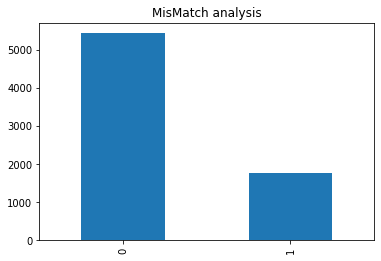

In [41]:
reviews_df.MisMatch.value_counts().plot(kind='bar',title="MisMatch analysis")

In [42]:
reviews_df[reviews_df.MisMatch == "1"]

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,test_without_SW,Word Count,Uppercase Char Count,Special Char Count,scores,compound,sentiment_type,MisMatch
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update Neither able to uninstall,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,Not able update Neither able uninstall,8,2,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,1
12,3898,https://play.google.com/store/apps/details?id=...,App is not getting update and it is not gettin...,1,0,Daksh Gulati,NaN,83.0.4103.106,2020-12-19,com.android.chrome,App getting update getting open saying u r usi...,27,1,0,"{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...",0.0726,POSITIVE,1
15,3901,https://play.google.com/store/apps/details?id=...,Very coming in real status Thank you,1,0,Richyy Gonzalez,NaN,87.0.4280.86,2020-12-19,com.android.chrome,Very coming real status Thank,7,2,0,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.3612,POSITIVE,1
17,3903,https://play.google.com/store/apps/details?id=...,Low download speed,3,0,omid rostami,NaN,87.0.4280.101,2020-12-19,com.android.chrome,Low download speed,3,1,0,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,NEGATIVE,1
19,3905,https://play.google.com/store/apps/details?id=...,I want to download greana free fire but that n...,1,0,Dinkar Kamble,NaN,87.0.4280.101,2020-12-19,com.android.chrome,I want download greana free fire comming file,13,1,0,"{'neg': 0.121, 'neu': 0.643, 'pos': 0.236, 'co...",0.1531,POSITIVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188,684976,https://play.google.com/store/apps/details?id=...,NET slow,1,0,Afzal Afini,NaN,83.0.4103.101,2021-03-05,com.android.chrome,NET slow,2,3,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,1
7189,684977,https://play.google.com/store/apps/details?id=...,Frustration,4,0,Leroy Smith,NaN,88.0.4324.181,2021-03-05,com.android.chrome,Frustration,1,1,0,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.4767,NEGATIVE,1
7193,684981,https://play.google.com/store/apps/details?id=...,Microsoft gang forever 😤💙,1,0,A A A A A A A A POQ,NaN,74.0.3729.136,2021-03-05,com.android.chrome,Microsoft gang forever 😤💙,4,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,1
7195,684983,https://play.google.com/store/apps/details?id=...,Chrome is good I trust this update will make i...,1,0,Harry W Kendall,NaN,88.0.4324.181,2021-03-05,com.android.chrome,Chrome good I trust update make better,11,2,0,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.8442,POSITIVE,1


### Sentiment andlysis With the help of text Blob 

In [43]:
data.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [44]:
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [45]:
df = data.copy()

In [46]:
df['Text'] = df['Text'].astype('str')

In [47]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['Text'].apply(get_polarity)

In [48]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,Polarity
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,0.200
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.700
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.125
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,0.600
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,0.500


In [49]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [50]:
df

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,Polarity,Sentiment_Type
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,0.200000,POSITIVE
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.700000,POSITIVE
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.125000,POSITIVE
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,0.600000,POSITIVE
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,0.500000,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
7199,684987,https://play.google.com/store/apps/details?id=...,Bagusss..,5,0,boima panjaitan,NaN,88.0.4324.93,2021-03-05,com.android.chrome,0.000000,NEUTRAL
7200,684988,https://play.google.com/store/apps/details?id=...,Bad version 😔,1,0,निशान्त सिंह,NaN,88.0.4324.181,2021-03-05,com.android.chrome,-0.700000,NEGATIVE
7201,684989,https://play.google.com/store/apps/details?id=...,One thing that I have to say I can't spelled t...,5,0,Virgie Allen,NaN,89.0.4389.72,2021-03-05,com.android.chrome,0.850000,POSITIVE
7202,684990,https://play.google.com/store/apps/details?id=...,Excellent,5,0,Kazuo Guevarra,NaN,89.0.4389.72,2021-03-05,com.android.chrome,1.000000,POSITIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

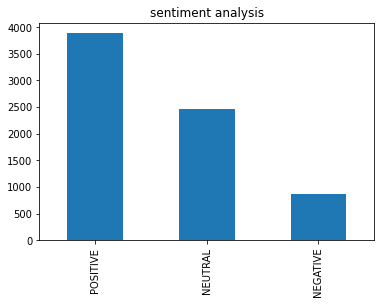

In [51]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="sentiment analysis")

In [52]:
df['MisMatch']='1'
df.loc[(df.Polarity>0) & (df.Star>3) ,'MisMatch']='0'
df.loc[(df.Polarity==0) & (df.Star==3) ,'MisMatch']='0'
df.loc[(df.Polarity<0) & (df.Star<3) ,'MisMatch']='0'

In [53]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,Polarity,Sentiment_Type,MisMatch
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,0.200,POSITIVE,0
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.700,POSITIVE,1
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.125,POSITIVE,1
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,0.600,POSITIVE,0
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,0.500,POSITIVE,1


In [54]:
df.MisMatch.value_counts()

0    3973
1    3231
Name: MisMatch, dtype: int64

In [55]:
df[df.MisMatch == "1"]

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,Polarity,Sentiment_Type,MisMatch
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.700000,POSITIVE,1
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.125000,POSITIVE,1
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,0.500000,POSITIVE,1
6,3892,https://play.google.com/store/apps/details?id=...,Yes yes,5,0,Leslie Harrison,NaN,87.0.4280.101,2020-12-19,com.android.chrome,0.000000,NEUTRAL,1
9,3895,https://play.google.com/store/apps/details?id=...,Many times I tried to update its not updating....,1,0,Aditi Rathor,NaN,86.0.4240.198,2020-12-19,com.android.chrome,0.250000,POSITIVE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,684982,https://play.google.com/store/apps/details?id=...,shubham gurjar,5,0,Krishan Dev,NaN,78.0.3904.108,2021-03-05,com.android.chrome,0.000000,NEUTRAL,1
7195,684983,https://play.google.com/store/apps/details?id=...,"Chrome is good, I trust this update will make ...",1,0,Harry W Kendall,NaN,88.0.4324.181,2021-03-05,com.android.chrome,0.600000,POSITIVE,1
7196,684984,https://play.google.com/store/apps/details?id=...,It will not let me update Samsung Galaxy a20,1,0,Mary Ferguson,NaN,84.0.4147.111,2021-03-05,com.android.chrome,0.000000,NEUTRAL,1
7199,684987,https://play.google.com/store/apps/details?id=...,Bagusss..,5,0,boima panjaitan,NaN,88.0.4324.93,2021-03-05,com.android.chrome,0.000000,NEUTRAL,1
